# PREDICTION USING SUPERVISED ML

In [77]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [78]:
#reading data 
df=pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [79]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [81]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


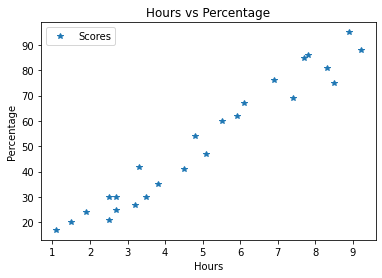

In [82]:
df.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

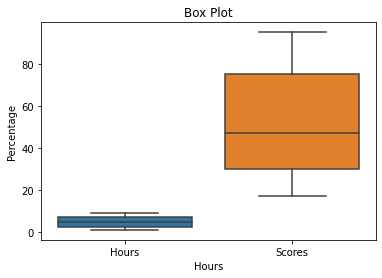

In [83]:
import seaborn as sns
sns.boxplot(data=df)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.title('Box Plot')
plt.show()

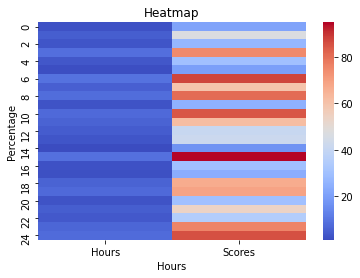

In [84]:
sns.heatmap(df, cmap='coolwarm')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.title('Heatmap')
plt.show()

The relation Matrix: 


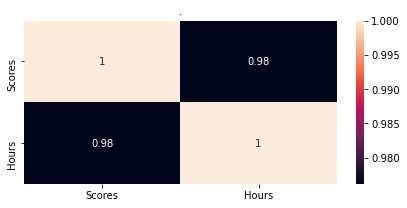

In [85]:
plt.figure(figsize=(7,3))
sns.heatmap(df[['Scores','Hours']].corr(), annot = True)
plt.title('.', fontsize = 10)
print('The relation Matrix: ')
plt.show()

<AxesSubplot:xlabel='Hours'>

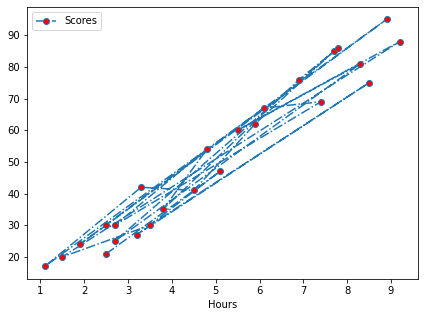

In [86]:
df.plot("Hours","Scores",linestyle = "-.",marker = "o", markerfacecolor = "red", figsize=(7,5))

In [87]:
x= df.iloc[:, :-1].values  
y= df.iloc[:, 1].values  

In [88]:
#splitting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [89]:
x_train

array([[7.8],
       [7.7],
       [7.4],
       [3.2],
       [8.5],
       [4.5],
       [2.5],
       [2.7],
       [5.1],
       [1.9],
       [6.1],
       [5.9],
       [3.8],
       [8.3],
       [2.7],
       [8.9],
       [5.5],
       [3.3],
       [4.8],
       [9.2],
       [3.5],
       [2.5]])

In [90]:
x_test

array([[1.5],
       [1.1],
       [6.9]])

In [91]:
y_train

array([86, 85, 69, 27, 75, 41, 30, 30, 47, 24, 67, 62, 35, 81, 25, 95, 60,
       42, 54, 88, 30, 21], dtype=int64)

In [92]:
y_test

array([20, 17, 76], dtype=int64)

In [93]:
#fitting the model
regressor = LinearRegression()  
regressor.fit(x_train.reshape(-1,1), y_train) 

LinearRegression()

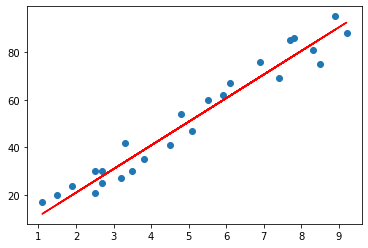

In [94]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red',)
plt.show()

In [97]:
y_pred = regressor.predict(x_test)

In [99]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1

,Actual,Predicted
0,20,16.055981
1,17,12.090916
2,76,69.584356


In [102]:
#Estimating training and test score
print("Training Score:",regressor.score(x_train,y_train)*100)
print("Test Score:",regressor.score(x_test,y_test)*100)

Training Score: 94.76703577089616
Test Score: 96.34101059435915


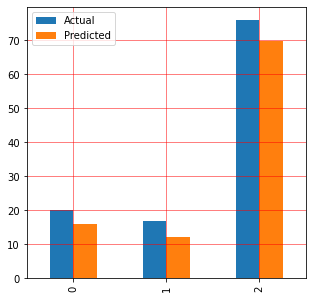

In [105]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
df1.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

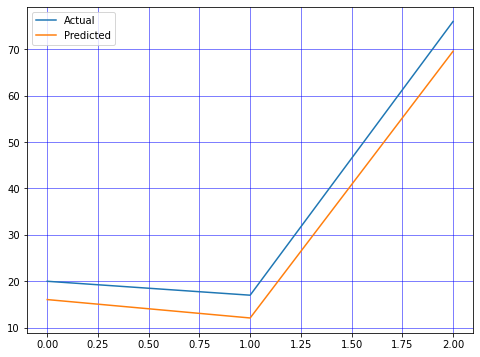

In [106]:
# Ploting the line graph to depict the difference between the actual and predicted value
df1.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [109]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.87911212766278


In [111]:
#evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.089582358299231
Mean Squared Error: 26.938293113084782
Root mean squared Error: 5.190211278270354
